<a href="https://colab.research.google.com/github/jeanluckei/deep-learning/blob/main/knn-fruits-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Realizar o upload das chaves para API geradas no Kaggle (kaggle.json)
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-36

In [9]:
##Imports e método para processamento das imagens e resize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import numpy as np
import cv2
import os
import argparse


def read_resize(imagePath):
    image = cv2.imread(imagePath)
    return cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)


def load(imagePaths):
  data = []
  labels = []
  for (i, imagePath) in enumerate(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = read_resize(imagePath)
    data.append(image)
    labels.append(label)
  return (np.array(data), np.array(labels))

In [ ]:
print("Carregando as imagens...")
imagePaths = list(paths.list_images('/content/fruits-360_dataset/fruits-360/Training'))
(data, labels) = load(imagePaths, verbose=500)
data = data.reshape((data.shape[0], 3072))
print("Tamanho total: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

Carregando as imagens...
Tamanho total: 198.3MB


In [ ]:
# Transformar os labels (nomes das pastas) em Integer
le = LabelEncoder()
labelsEncoded = le.fit_transform(labels)

# Separando os dados de treino e teste em 80% x 20%
# Random state 42 pois é a resposta para todas as perguntas
(trainX, testX, trainY, testY) = train_test_split(data, labelsEncoded,	test_size=0.2, random_state=42)

Gerando gráfico de acurácia x K neighbors


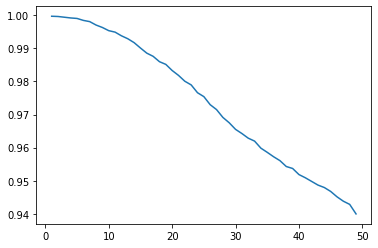

Acurácia máxima atingida em k=1 com valor de 0.9997045572051112


In [ ]:
print("Gerando gráfico de acurácia x K neighbors")
lix = []
liy = []
index=0
acc=0
for k in range(1, 50):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(trainX, trainY)
    liy.append(neigh.score(testX, testY))
    if liy[k-1]>=acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("Acurácia máxima atingida em k="+str(index+1)+" com valor de "+str(acc))

In [ ]:
print("Como encontrado acima, 1 é o maior valor sem perder acurácia")
model = KNeighborsClassifier(n_neighbors=1,	n_jobs=-1)
model.fit(trainX, trainY)
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

Como encontrado acima, 1 é o maior valor sem perder acurácia
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        91
 Apple Crimson Snow       1.00      1.00      1.00        86
     Apple Golden 1       1.00      1.00      1.00        96
     Apple Golden 2       1.00      1.00      1.00       102
     Apple Golden 3       1.00      1.00      1.00        94
 Apple Granny Smith       1.00      1.00      1.00       106
    Apple Pink Lady       1.00      1.00      1.00        77
        Apple Red 1       1.00      1.00      1.00       101
        Apple Red 2       1.00      1.00      1.00       104
        Apple Red 3       1.00      1.00      1.00        97
Apple Red Delicious       1.00      1.00      1.00        96
 Apple Red Yellow 1       1.00      1.00      1.00       110
 Apple Red Yellow 2       1.00      1.00      1.00       147
            Apricot       0.99      1.00      0.99        89
            Avocado    

In [13]:
print("Predizendo imagem teste:\n")

labels = sorted(list(dict.fromkeys(labels)))

# Descomente apenas uma imagePath abaixo para realizar o teste
imagePath = "/content/fruits-360_dataset/fruits-360/Test/Apple Red Delicious/0_100.jpg"
#imagePath = "/content/fruits-360_dataset/fruits-360/Test/Clementine/58_100.jpg"
#imagePath = "/content/fruits-360_dataset/fruits-360/Test/Cherry 2/r2_275_100.jpg"
#imagePath = "/content/fruits-360_dataset/fruits-360/Test/Avocado ripe/204_100.jpg"
#imagePath = "/content/fruits-360_dataset/fruits-360/Test/Granadilla/315_100.jpg"

data = np.array([read_resize(imagePath)])
data = data.reshape((data.shape[0], 3072))

test_pred = model.predict(data)
print(labels[int(test_pred)])

Predizendo imagem teste:

Apple Red Delicious
